In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from citipy import citipy
from pprint import pprint
from random import seed
from random import randint

# weather API Dependencies
import requests
from config import OpenWeatherMap_api_key as api_key

# Time calculations
import time
from datetime import datetime
from time import strftime

# Printing and Output Controls
import sys
import os

In [2]:
###########################
### DICTIONARY VERSION ####
###########################

# set up to generate random integer values
# seed random number generator
seed(1)
# create empty dictionary to store all the initial data
city_dictionary = {}

# set up weaather config information.
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
weather_units = "imperial"
city_count = 0

# set up output paths
Output_Data_Path_Folder = "Output" 
Output_Log_txt = 'City_Process_Log.txt'
Output_Log_Path = os.path.join(Output_Data_Path_Folder,Output_Log_txt)

# Set up the print over-ride to direct the logging to a file
original_stdout = sys.stdout # Save a reference to the original standard output

with open(Output_Log_Path, 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    
    # generate 1400 entries and calculate the Latitude and Longitude from the random number 
    for i in range(1400):

        # use -9000 to 9000 for the range and divide by 100 to get the correct form (xx.xx) for latitude
        Random_Latitude = randint(-9000, 9000) /100

        # use -18000 to 18000 for the range and divide by 100 to get the correct form (xxx.xx) for Longitude
        Random_Longitude = randint(-18000, 18000) /100

        # find the closest city
        city = citipy.nearest_city(Random_Latitude,Random_Longitude)

        # check to see if this city is already in the list...if not, add an entry for it and the other info...if it already is, ignore it
        if city_dictionary.get(city.city_name) == None:
            # since "not found" then we have a new city and should look it up
            # Build weather query URL and request your results in imperial units
            query_url = f"{weather_url}appid={api_key}&q={city.city_name}&units={weather_units}"
            city.city_name
        # Do an API call to get weather data
            weather_json = requests.get(query_url).json()

        # Get all the whether info from JSON response
            try:
                temperature    = weather_json["main"]["temp_max"]
            except KeyError:
                print(f"Processing search iteration: {i}, Status: Key Error, OpenWeatherMap API could not find city: {city.city_name}")
                continue 
            humidity       = weather_json["main"]["humidity"]
            cloudiness     = weather_json["clouds"]["all"]
            wind_speed     = weather_json["wind"]["speed"]
            real_latitude  = weather_json["coord"]["lat"]
            real_longitude = weather_json["coord"]["lon"]
            city_name_w    = weather_json["name"]
            date_time_UTC  = weather_json["dt"]
            shift          = weather_json["timezone"]  
            date_time_city = time.strftime("%a, %d %b %Y %H:%M:%S", time.gmtime((date_time_UTC + shift)))

            # Update the list with the new entry and associated data
            city_dictionary[city.city_name] = [city_name_w,temperature, humidity, cloudiness, wind_speed,real_latitude,real_longitude,city.country_code,date_time_city,Random_Latitude,Random_Longitude]
            # update the count of successful searches and adds
            city_count +=1
            print(f"Processing search iteration: {i}, Status: Success! The City Count is: {city_count} and the unique name is: {city.city_name}")
        else:
            print(f"Processing search iteration: {i}, Status: Duplicate City: {city.city_name}")

# reset the search log printout back to console
sys.stdout = original_stdout # Reset the standard output to its original valu

In [3]:
# Check that we have at least 500 cities...
print(f"The number of unique cities generated is: {len(city_dictionary)}")

The number of unique cities generated is: 541


In [4]:
# Convert the dictionary to a DataFrame and name the columns
city_df = pd.DataFrame.from_dict(city_dictionary, orient='index',columns=['City Name','Max Temperature','Humidity %','Cloud Coverage %','Wind Speed (mph)','City Latitude','City Longitude','City Country',"City Local Date_Time",'Random_Latitude', 'Random_Longitude'])

In [5]:
print(f"The unique city table is constructed and looks like: \n\n")
city_df.head()

The unique city table is constructed and looks like: 




,City Name,Max Temperature,Humidity %,Cloud Coverage %,Wind Speed (mph),City Latitude,City Longitude,City Country,City Local Date_Time,Random_Latitude,Random_Longitude
rikitea,Rikitea,78.19,70,100,9.95,-23.1203,-134.9692,pf,"Sat, 06 Feb 2021 13:22:53",-45.98,-138.65
puerto ayora,Puerto Ayora,86.00,62,0,16.11,-0.7393,-90.3518,ec,"Sat, 06 Feb 2021 16:25:52",-6.42,-102.73
saskylakh,Saskylakh,-36.92,80,92,6.69,71.9167,114.0833,ru,"Sun, 07 Feb 2021 07:27:23",72.34,114.57
aksarka,Aksarka,-34.64,82,97,19.75,66.5606,67.7975,ru,"Sun, 07 Feb 2021 03:27:23",64.74,68.78
barrow,Barrow,-5.80,77,75,10.36,71.2906,-156.7887,us,"Sat, 06 Feb 2021 13:27:23",69.86,-161.43


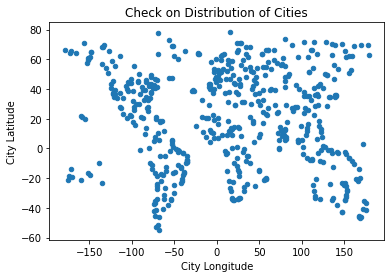

In [6]:
# check on the randomness of the data to see if it generally conforms to the shape of the continents
Scatter_Data_Graph = city_df.plot(x='City Longitude', y="City Latitude", kind="scatter",title="Check on Distribution of Cities")

In [7]:
# Set Path to the output file in the analysis folder
DataFrame_File_CSV = 'City_DataFrame_CSV_Output.csv'
Output_CSV_Path = os.path.join(Output_Data_Path_Folder,DataFrame_File_CSV)

# Open the data file with write capabilities
city_df.to_csv(Output_CSV_Path, index = False)